1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [2]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

[2.01241514e+01 1.38502280e-15 2.59862658e+00]
[[-0.09646393 -0.81649658  0.56923461]
 [-0.60070324 -0.40824829 -0.68737832]
 [-0.7936311   0.40824829  0.4510909 ]]
 
[2.01241514e+01 2.59862658e+00 1.05868258e-15]
[[-0.09646393  0.56923461 -0.81649658]
 [-0.60070324 -0.68737832 -0.40824829]
 [-0.7936311   0.4510909   0.40824829]]
 
1 componente: 88.56378132042695
2 componenti: 100.0
We need 2 components


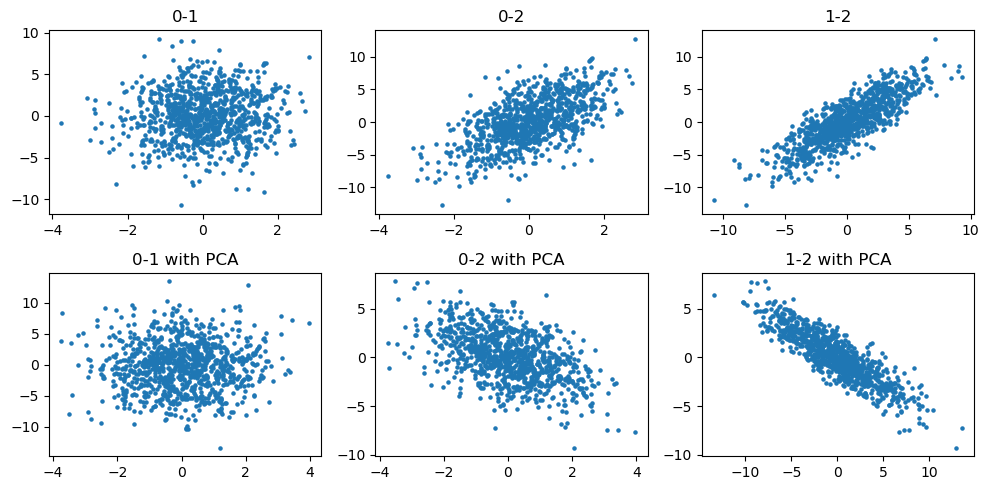

In [3]:
N = 1000
mu = 0
sigma = 1
mu2 = 0
sigma2 = 3

x1 = np.random.normal(loc = mu, scale = sigma, size = N)
x2 = np.random.normal(loc=mu2, scale = sigma2, size = N)
x3 = 2*x1+x2
X = [x1, x2, x3]

#Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
C = np.cov(X)
l,V = np.linalg.eig(C)
print(l)
print(V)
print(" ")

#Find the eigenvectors and eigenvalues using the SVD
U, s, _ = la.svd(C)
print(s)
print(U)
print(" ")

p_c = l[0]/l.sum()
print("1 componente:", p_c*100)

s_c = (l[0]+l[2]) /l.sum()
print("2 componenti:", s_c*100)
print("We need 2 components")
Xp = np.dot(V, X)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

[[ax01, ax02, ax03],[ax11, ax12, ax13]] = axes

ax01.scatter(X[0], X[1], s=5)
ax01.set_title('0-1')

ax02.scatter(X[0], X[2], s=5)
ax02.set_title('0-2')

ax03.scatter(X[1], X[2], s=5)
ax03.set_title('1-2')

ax11.scatter(Xp[0], Xp[1], s= 5)
ax11.set_title('0-1 with PCA')

ax12.scatter(Xp[0], Xp[2], s= 5)
ax12.set_title('0-2 with PCA')

ax13.scatter(Xp[1], Xp[2], s= 5)
ax13.set_title('1-2 with PCA')

plt.tight_layout()
plt.show()

# 2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

[2.01211797e+01 3.86987272e-03 2.60229995e+00]
[[-0.09659665 -0.81664867  0.56899388]
 [-0.60095374 -0.40785322 -0.68739389]
 [-0.79342529  0.40833895  0.45137081]]
 
[2.01541960e+01 2.60326347e+00 3.87556603e-03]
[[-0.09679726  0.56898605 -0.81663037]
 [-0.60074139 -0.68757553 -0.40785988]
 [-0.79356164  0.45110394  0.40836889]]
 
99.98297261758141
 


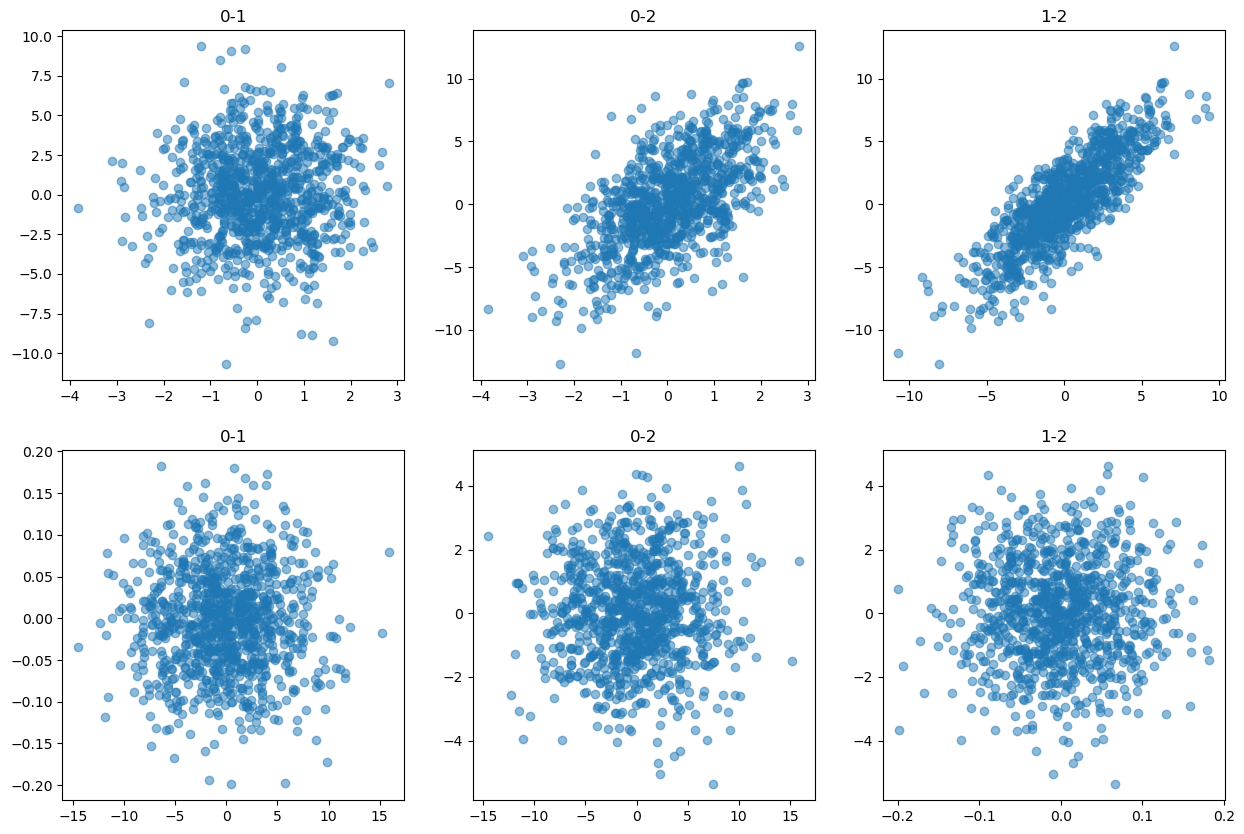

In [4]:
noises = np.random.normal(loc=0, scale=1/50, size=(3, N, 10))
x_noise = X + np.sum(noises, axis = 2)

cov1 = np.cov(x_noise)
l1, V1 = np.linalg.eig(cov1)
l1 = np.real_if_close(l1)
print(l1)
print(V1)
print(" ")

U1, S1, Vt1 = la.svd(x_noise)
l_svd1 = S1**2/(N-1)
V_svd1 = U1
print(l_svd1)
print(V_svd1)
print(" ")

print((np.sum(l1[[0,2]])/np.diag(l1).trace())*100)
print(" ")

x_new1 = np.dot(V1.T,x_noise)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axs[0,0].scatter(x_noise[0,:],x_noise[1,:], alpha=0.5)
axs[0,0].set_title('0-1')

axs[0,1].scatter(x_noise[0,:],x_noise[2,:], alpha=0.5)
axs[0,1].set_title('0-2')

axs[0,2].scatter(x_noise[1,:],x_noise[2,:], alpha=0.5)
axs[0,2].set_title('1-2')

axs[1,0].scatter(x_new1[0,:],x_new1[1,:], alpha=0.5)
axs[1,0].set_title('0-1')

axs[1,1].scatter(x_new1[0,:],x_new1[2,:], alpha=0.5)
axs[1,1].set_title('0-2')

axs[1,2].scatter(x_new1[1,:],x_new1[2,:], alpha=0.5)
axs[1,2].set_title('1-2')

plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [5]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [18]:
file = 'data/magic04.data'
data = pd.read_csv(file, header=None)

data = np.asarray(data.to_numpy()[0:,0:10],dtype='float32').T
Cv = np.cov(data)

l, V  = la.eig(Cv) 
l = np.real_if_close(l)

Fp = np.dot(V.T, data) 

for i in range(len(l)):
    print(100*abs(np.diag(l)[i,i]/np.diag(l).trace()))

sort_l = np.sort(l)[::-1]

count = 0
numb= 0

for i in range(len(sort_l)):
    if count >= 99:
        break
    count=count + abs(100*(sort_l[i]/np.diag(l).trace()))
    numb=numb+1
print(" ")
print(str(count)+"% of variability retained")
print(str(numb)+" components")

44.04728319167095
25.799073842355153
13.498330451900516
8.881764730456403
4.084793778088304
2.9026551618062184
0.7854460242725385
0.0005783670862553774
7.18728860107756e-05
2.579477657352842e-06
 
99.21390115627756% of variability retained
6 components
